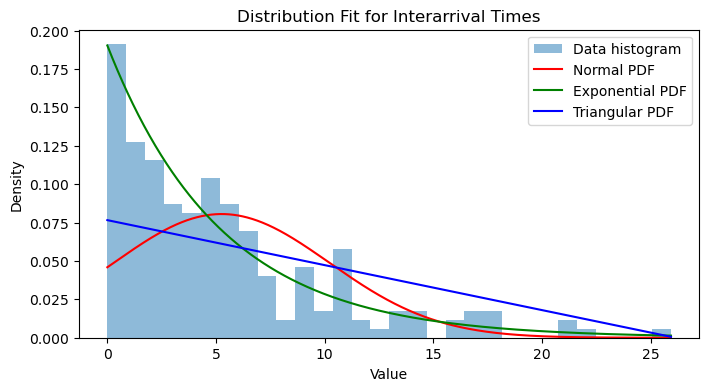

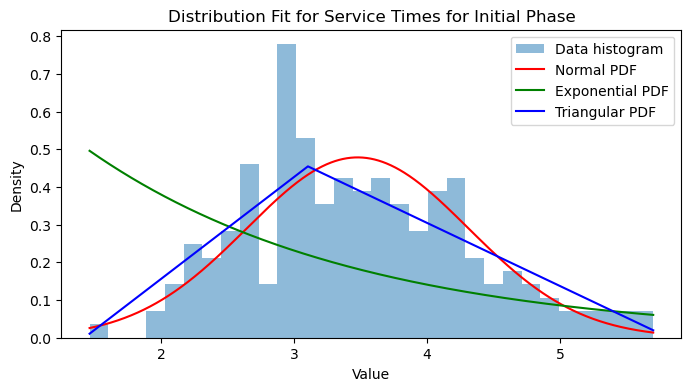

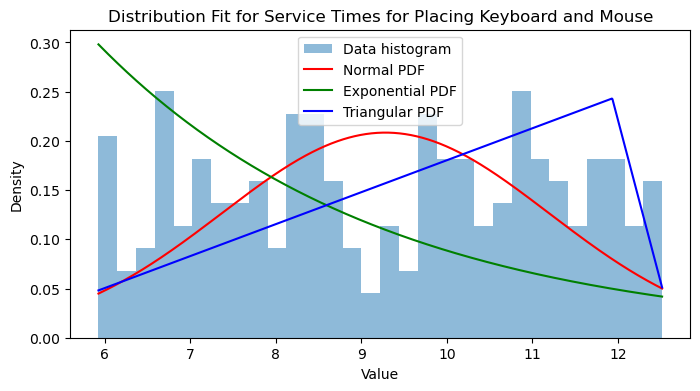

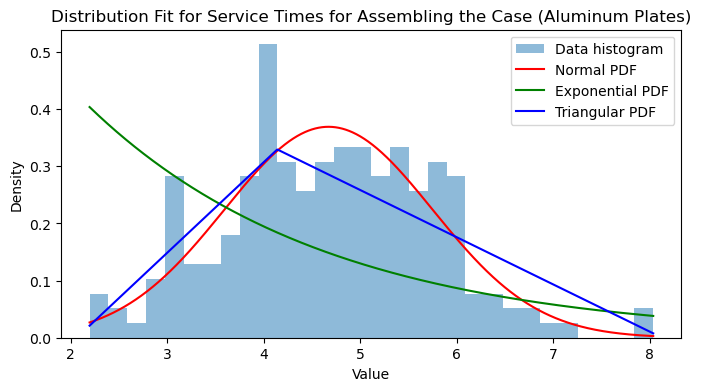


Case: Interarrival Times
 Normal fit:
   mu: 5.2632
   sigma: 4.9542
   ks_stat: 0.1444
   p_value: 0.0004
 Exponential fit:
   loc: 0.0076
   scale: 5.2556
   ks_stat: 0.0475
   p_value: 0.7384
 Triangular fit:
   c: 0.0000
   loc: 0.0076
   scale: 26.1237
   ks_stat: 0.2969
   p_value: 0.0000

Case: Service Times for Initial Phase
 Normal fit:
   mu: 3.4779
   sigma: 0.8336
   ks_stat: 0.0671
   p_value: 0.3142
 Exponential fit:
   loc: 1.4620
   scale: 2.0160
   ks_stat: 0.3084
   p_value: 0.0000
 Triangular fit:
   c: 0.3823
   loc: 1.4225
   scale: 4.3964
   ks_stat: 0.0637
   p_value: 0.3751

Case: Service Times for Placing Keyboard and Mouse
 Normal fit:
   mu: 9.2813
   sigma: 1.9146
   ks_stat: 0.0829
   p_value: 0.1209
 Exponential fit:
   loc: 5.9254
   scale: 3.3558
   ks_stat: 0.1693
   p_value: 0.0000
 Triangular fit:
   c: 0.9103
   loc: 4.4445
   scale: 8.2275
   ks_stat: 0.1568
   p_value: 0.0001

Case: Service Times for Assembling the Case (Aluminum Plates)
 Normal f

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, triang, kstest

# Load the CSV file (adjust the file path as needed)
data = pd.read_csv("Data_File - Data_File.xls.csv", header=None)

# Prepare a dictionary to hold data for each case
cases_data = {}

# Each row: first column is case name, the rest are data values.
for idx, row in data.iterrows():
    case_name = row.iloc[0]
    values = pd.to_numeric(row.iloc[1:], errors='coerce')
    cases_data[case_name] = values.dropna()

# Loop through each case and perform the fits and tests.
results = {}

for case, values in cases_data.items():
    results[case] = {}
    
    # 1. Normal distribution fit
    mu, sigma = norm.fit(values)
    ks_stat_norm, p_val_norm = kstest(values, 'norm', args=(mu, sigma))
    results[case]['Normal'] = {'mu': mu, 'sigma': sigma,
                               'ks_stat': ks_stat_norm, 'p_value': p_val_norm}
    
    # 2. Exponential distribution fit
    # The exponential distribution in scipy is defined for x>=loc; usually we fit for loc and scale.
    loc_expo, scale_expo = expon.fit(values)
    ks_stat_expo, p_val_expo = kstest(values, 'expon', args=(loc_expo, scale_expo))
    results[case]['Exponential'] = {'loc': loc_expo, 'scale': scale_expo,
                                    'ks_stat': ks_stat_expo, 'p_value': p_val_expo}
    
    # 3. Triangular distribution fit
    # Triangular distribution is parameterized with a shape parameter 'c', loc, and scale.
    c_tri, loc_tri, scale_tri = triang.fit(values)
    ks_stat_tri, p_val_tri = kstest(values, 'triang', args=(c_tri, loc_tri, scale_tri))
    results[case]['Triangular'] = {'c': c_tri, 'loc': loc_tri, 'scale': scale_tri,
                                   'ks_stat': ks_stat_tri, 'p_value': p_val_tri}

    # Optionally, plot histogram and overlay the PDFs for visual comparison
    plt.figure(figsize=(8, 4))
    count, bins, ignored = plt.hist(values, bins=30, density=True, alpha=0.5, label='Data histogram')
    x = np.linspace(bins[0], bins[-1], 1000)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Normal PDF')
    plt.plot(x, expon.pdf(x, loc_expo, scale_expo), 'g-', label='Exponential PDF')
    plt.plot(x, triang.pdf(x, c_tri, loc_tri, scale_tri), 'b-', label='Triangular PDF')
    plt.title(f'Distribution Fit for {case}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Display the fitting and K-S test results
for case, fit_info in results.items():
    print(f"\nCase: {case}")
    for dist, params in fit_info.items():
        print(f" {dist} fit:")
        for key, value in params.items():
            print(f"   {key}: {value:.4f}")


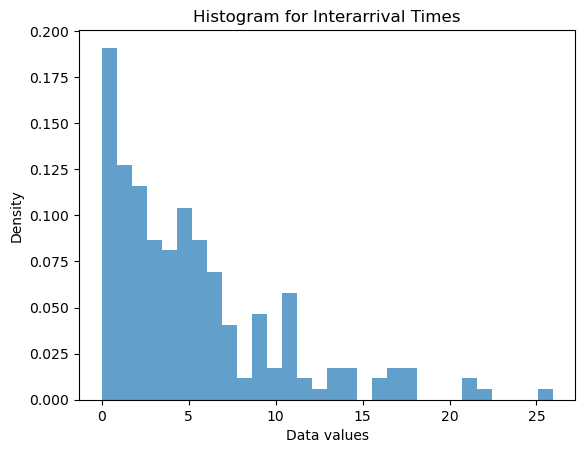

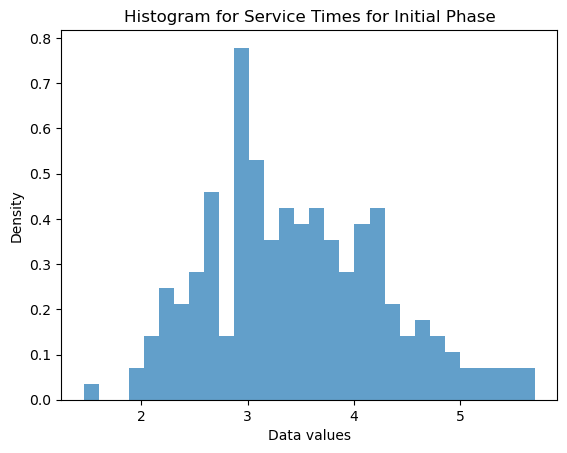

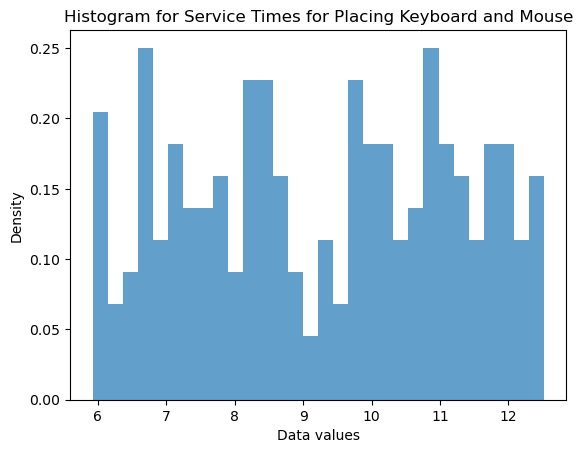

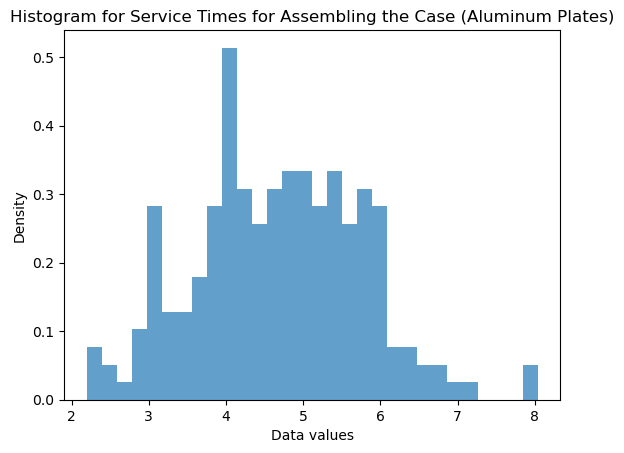

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file without headers since the first element of each row is the case name
data = pd.read_csv("Data_File - Data_File.xls.csv", header=None)

# Initialize a dictionary to hold each case's data
cases_data = {}

# Iterate over the rows: first column is the case name, remaining columns are the data
for index, row in data.iterrows():
    case_name = row.iloc[0]
    # Convert the remaining values to numeric (in case they're read as strings)
    values = pd.to_numeric(row.iloc[1:], errors='coerce')
    cases_data[case_name] = values.dropna()  # Drop any non-numeric or missing values

# Plot a histogram for each case
for case, values in cases_data.items():
    plt.figure()
    plt.hist(values, bins=30, density=True, alpha=0.7)
    plt.title(f'Histogram for {case}')
    plt.xlabel('Data values')
    plt.ylabel('Density')
    plt.show()


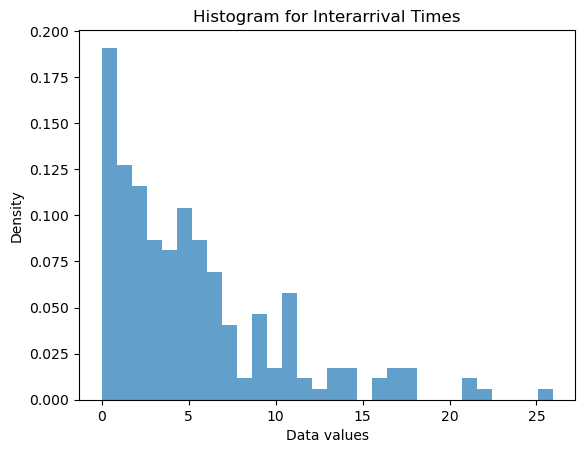

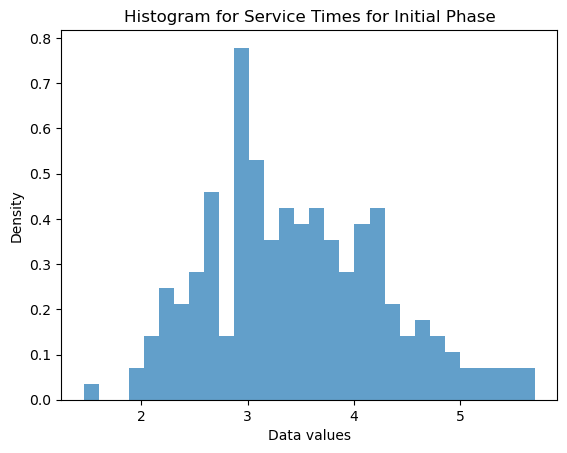

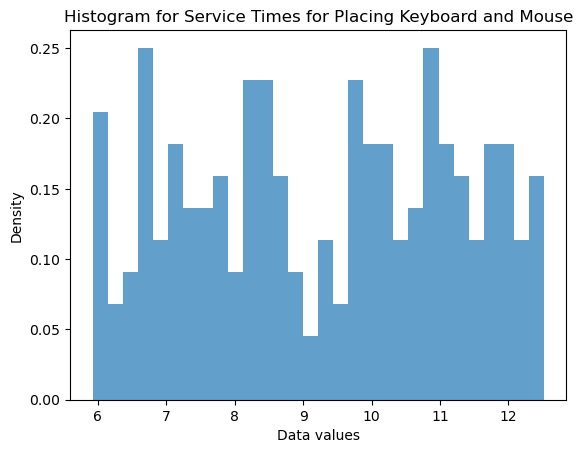

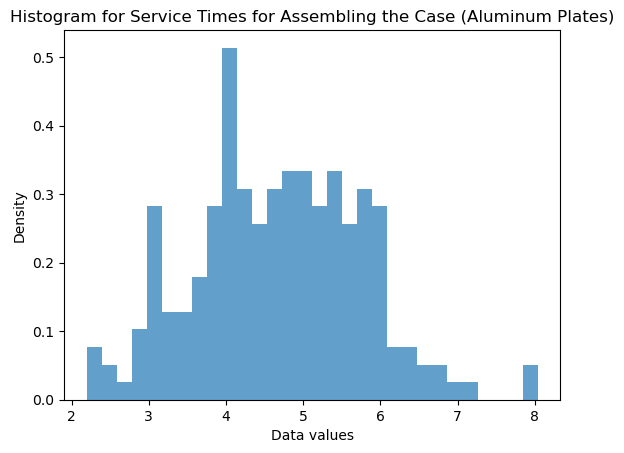

Results for Interarrival Times:
  Normal Distribution:
    mu: 5.2632162108
    std: 4.954186096152406
    KS_stat: 0.14438020135318008
    p_value: 0.0004215266279912548
  Exponential Distribution:
    loc: 0.00759326
    scale: 5.255622950799999
    KS_stat: 0.04753273028519045
    p_value: 0.7383856160038368
  Triangular Distribution:
    c: 6.140130812334116e-10
    loc: 0.0075609950411539084
    scale: 26.123700163308172
    KS_stat: 0.29685399315845795
    p_value: 4.0499041042682357e-16


Results for Service Times for Initial Phase:
  Normal Distribution:
    mu: 3.47791275
    std: 0.8336249078254185
    KS_stat: 0.06712661683665333
    p_value: 0.3142108233830908
  Exponential Distribution:
    loc: 1.46196
    scale: 2.0159527500000003
    KS_stat: 0.3083580466088338
    p_value: 2.2011040758452653e-17
  Triangular Distribution:
    c: 0.38232297575729407
    loc: 1.4225455597199517
    scale: 4.3964371339736505
    KS_stat: 0.06373425972603365
    p_value: 0.3751225967898537

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, expon, triang, kstest

# --- Step 1: Load the Data ---
# Load the CSV file without header since the first element is the case name.
data = pd.read_csv("Data_File - Data_File.xls.csv", header=None)

# Dictionary to store data for each case
cases_data = {}
for idx, row in data.iterrows():
    case_name = row.iloc[0]
    # Convert remaining elements to numeric, dropping any non-numeric values
    values = pd.to_numeric(row.iloc[1:], errors='coerce').dropna()
    cases_data[case_name] = values

# (Optional) Visualize the data with histograms for each case
for case, values in cases_data.items():
    plt.figure()
    plt.hist(values, bins=30, density=True, alpha=0.7)
    plt.title(f'Histogram for {case}')
    plt.xlabel('Data values')
    plt.ylabel('Density')
    plt.show()

# --- Step 2 & 3: Fit Distributions and Perform K-S Tests ---
# We'll fit three distributions: Normal, Exponential, and Triangular.
results = {}

for case, values in cases_data.items():
    case_results = {}
    
    # 1. Fit Normal Distribution
    mu, std = norm.fit(values)
    ks_stat_norm, p_val_norm = kstest(values, 'norm', args=(mu, std))
    case_results['Normal'] = {
        'mu': mu,
        'std': std,
        'KS_stat': ks_stat_norm,
        'p_value': p_val_norm
    }
    
    # 2. Fit Exponential Distribution
    # Note: scipy's expon.fit returns loc and scale.
    loc_exp, scale_exp = expon.fit(values)
    ks_stat_expon, p_val_expon = kstest(values, 'expon', args=(loc_exp, scale_exp))
    case_results['Exponential'] = {
        'loc': loc_exp,
        'scale': scale_exp,
        'KS_stat': ks_stat_expon,
        'p_value': p_val_expon
    }
    
    # 3. Fit Triangular Distribution
    # The triangular distribution in scipy is defined by a shape parameter c (0 <= c <= 1), plus loc and scale.
    c_tri, loc_tri, scale_tri = triang.fit(values)
    ks_stat_tri, p_val_tri = kstest(values, 'triang', args=(c_tri, loc_tri, scale_tri))
    case_results['Triangular'] = {
        'c': c_tri,
        'loc': loc_tri,
        'scale': scale_tri,
        'KS_stat': ks_stat_tri,
        'p_value': p_val_tri
    }
    
    results[case] = case_results

# --- Display the Results ---
for case, case_results in results.items():
    print(f"Results for {case}:")
    for dist, params in case_results.items():
        print(f"  {dist} Distribution:")
        for key, value in params.items():
            print(f"    {key}: {value}")
    print("\n")


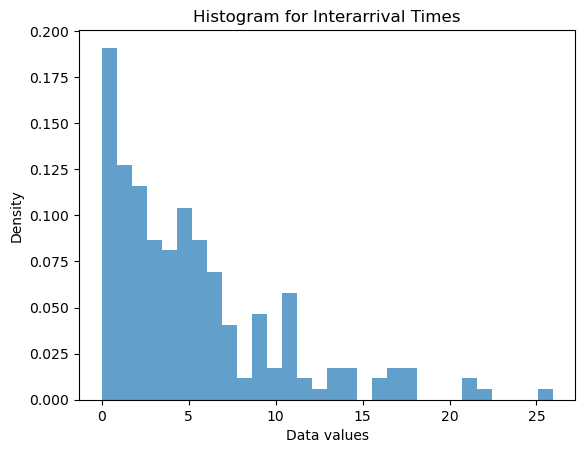

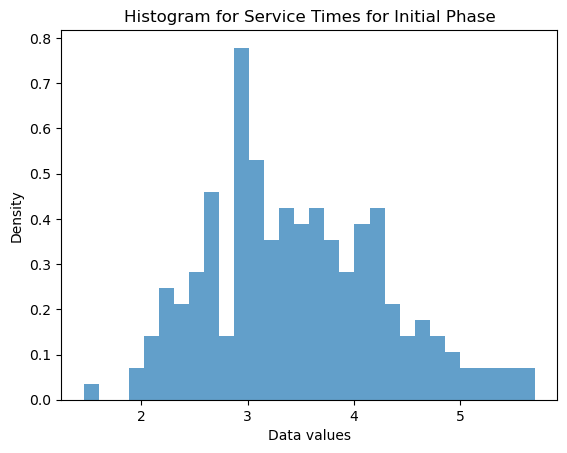

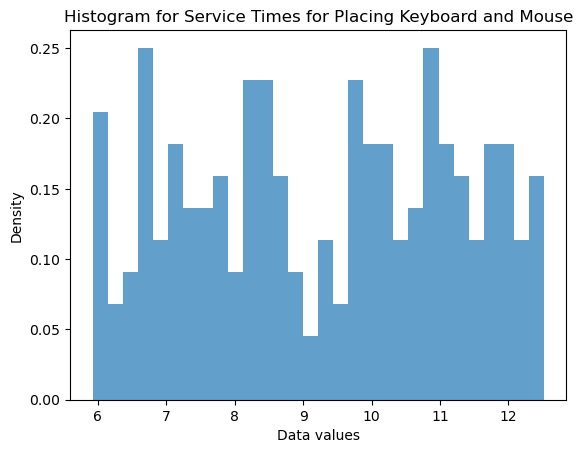

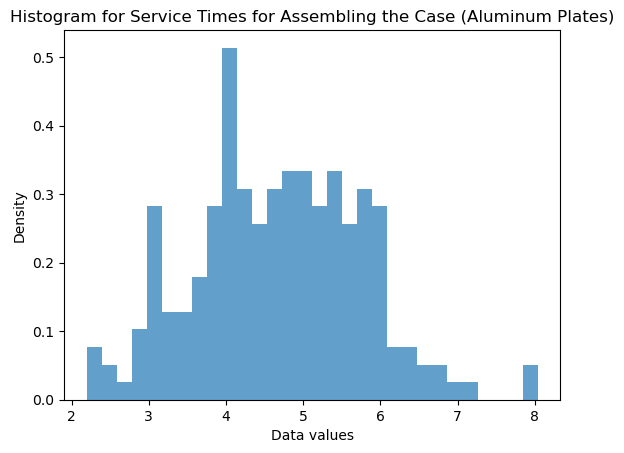

Results for Interarrival Times:
  Normal Distribution:
    mu: 5.2632162108
    std: 4.954186096152406
    KS_stat: 0.14438020135318008
    p_value: 0.0004215266279912548
  Exponential Distribution:
    loc: 0.00759326
    scale: 5.255622950799999
    KS_stat: 0.04753273028519045
    p_value: 0.7383856160038368
  Triangular Distribution:
    c: 6.140130812334116e-10
    loc: 0.0075609950411539084
    scale: 26.123700163308172
    KS_stat: 0.29685399315845795
    p_value: 4.0499041042682357e-16
  Best Fit Distribution: Exponential
    loc: 0.00759326
    scale: 5.255622950799999
    KS_stat: 0.04753273028519045
    p_value: 0.7383856160038368


Results for Service Times for Initial Phase:
  Normal Distribution:
    mu: 3.47791275
    std: 0.8336249078254185
    KS_stat: 0.06712661683665333
    p_value: 0.3142108233830908
  Exponential Distribution:
    loc: 1.46196
    scale: 2.0159527500000003
    KS_stat: 0.3083580466088338
    p_value: 2.2011040758452653e-17
  Triangular Distribution

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, expon, triang, kstest

# --- Step 1: Load the Data ---
# Load the CSV file without header since the first element is the case name.
data = pd.read_csv("Data_File - Data_File.xls.csv", header=None)

# Dictionary to store data for each case
cases_data = {}
for idx, row in data.iterrows():
    case_name = row.iloc[0]
    # Convert remaining elements to numeric, dropping any non-numeric values
    values = pd.to_numeric(row.iloc[1:], errors='coerce').dropna()
    cases_data[case_name] = values

# (Optional) Visualize the data with histograms for each case
for case, values in cases_data.items():
    plt.figure()
    plt.hist(values, bins=30, density=True, alpha=0.7)
    plt.title(f'Histogram for {case}')
    plt.xlabel('Data values')
    plt.ylabel('Density')
    plt.show()

# --- Step 2 & 3: Fit Distributions, Perform K-S Tests, and Select Best Fit ---
results = {}

for case, values in cases_data.items():
    case_results = {}
    
    # 1. Fit Normal Distribution
    mu, std = norm.fit(values)
    ks_stat_norm, p_val_norm = kstest(values, 'norm', args=(mu, std))
    case_results['Normal'] = {
        'mu': mu,
        'std': std,
        'KS_stat': ks_stat_norm,
        'p_value': p_val_norm
    }
    
    # 2. Fit Exponential Distribution
    loc_exp, scale_exp = expon.fit(values)
    ks_stat_expon, p_val_expon = kstest(values, 'expon', args=(loc_exp, scale_exp))
    case_results['Exponential'] = {
        'loc': loc_exp,
        'scale': scale_exp,
        'KS_stat': ks_stat_expon,
        'p_value': p_val_expon
    }
    
    # 3. Fit Triangular Distribution
    c_tri, loc_tri, scale_tri = triang.fit(values)
    ks_stat_tri, p_val_tri = kstest(values, 'triang', args=(c_tri, loc_tri, scale_tri))
    case_results['Triangular'] = {
        'c': c_tri,
        'loc': loc_tri,
        'scale': scale_tri,
        'KS_stat': ks_stat_tri,
        'p_value': p_val_tri
    }
    
    # Determine best fit based on the highest p-value
    best_fit_name = max(case_results, key=lambda dist: case_results[dist]['p_value'])
    case_results['Best_Fit'] = {
        'distribution': best_fit_name,
        'parameters': case_results[best_fit_name]
    }
    
    results[case] = case_results

# --- Display the Results ---
for case, case_results in results.items():
    print(f"Results for {case}:")
    for dist, params in case_results.items():
        if dist != 'Best_Fit':
            print(f"  {dist} Distribution:")
            for key, value in params.items():
                print(f"    {key}: {value}")
    best_fit = case_results['Best_Fit']
    print(f"  Best Fit Distribution: {best_fit['distribution']}")
    for key, value in best_fit['parameters'].items():
        print(f"    {key}: {value}")
    print("\n")
